# Exploration des données immobilières (USA)

_Généré automatiquement le 2025-10-27 23:20:15_

Ce notebook réalise une exploration structurée du dataset **American House Prices and Demographics of Top Cities** :
- Chargement des données
- Inspection générale (structure, types, mémoire)
- Statistiques descriptives
- Valeurs manquantes
- Distribution des prix (histogramme)
- Agrégation par État (prix moyen et nombre de maisons)
- Carte interactive (Folium + MarkerCluster)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

# Affichage : nombres en format normal (pas notation scientifique)
pd.set_option('display.float_format', '{:,.2f}'.format)

# >>>> IMPORTANT : modifiez ce chemin selon votre machine <<<<
DATA_PATH = r'C:\\vscode\\projet PAI\\American_Housing_Data_20231209.csv'  # ex. Windows
# DATA_PATH = 'American_Housing_Data_20231209.csv'  # ex. relatif

df = pd.read_csv(DATA_PATH)
print('Aperçu :')
display(df.head())

Aperçu :


,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,"3,999,000.00",2,3,1967,74 GRAND ST APT 3,New York,New York,29563,"20,967.90",New York,"370,046.00",40.72,-74.00
1,10013,"3,999,000.00",2,3,1967,74 GRAND ST APT 3,New York,New York,29563,"20,967.90",New York,"370,046.00",40.72,-74.00
2,10014,"1,650,000.00",1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,"23,740.90",New York,"249,880.00",40.73,-74.01
3,10014,"760,000.00",3,2,1538,38 JONES ST,New York,New York,29815,"23,740.90",New York,"249,880.00",40.73,-74.01
4,10014,"1,100,000.00",1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,"23,740.90",New York,"249,880.00",40.73,-74.01


## 2. Inspection générale
Dimensions, types, et mémoire occupée.

In [10]:
print('\n--- Info générale ---')
df.info()

print('\n--- Statistiques descriptives (numériques) ---')
display(df.describe())

print('\n--- Valeurs manquantes par colonne ---')
display(df.isnull().sum())


--- Info générale ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39981 entries, 0 to 39980
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 39981 non-null  int64  
 1   Price                    39981 non-null  float64
 2   Beds                     39981 non-null  int64  
 3   Baths                    39981 non-null  int64  
 4   Living Space             39981 non-null  int64  
 5   Address                  39981 non-null  object 
 6   City                     39981 non-null  object 
 7   State                    39981 non-null  object 
 8   Zip Code Population      39981 non-null  int64  
 9   Zip Code Density         39981 non-null  float64
 10  County                   39981 non-null  object 
 11  Median Household Income  39979 non-null  float64
 12  Latitude                 39981 non-null  float64
 13  Longitude                39981 non-null  float64
dtyp

,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
count,"39,981.00","39,981.00","39,981.00","39,981.00","39,981.00","39,981.00","39,981.00","39,979.00","39,981.00","39,981.00"
mean,"64,833.39","622,777.12",3.17,2.47,"1,901.52","37,726.20","2,379.41","110,837.26",36.44,-98.08
std,"25,614.60","946,979.31",1.31,1.32,"1,211.31","18,672.65","2,946.57","47,309.06",4.45,15.06
min,"10,013.00","1,800.00",1.00,1.00,2.00,0.00,0.00,"27,475.00",25.73,-122.83
25%,"40,215.00","265,000.00",3.00,2.00,"1,200.00","24,465.00",902.40,"76,640.00",33.24,-111.64
50%,"74,136.00","399,900.00",3.00,2.00,"1,639.00","35,049.00","1,588.70","100,405.00",36.17,-96.84
75%,"85,730.00","674,990.00",4.00,3.00,"2,265.00","46,816.00","2,736.80","135,075.00",39.28,-85.66
max,"98,199.00","38,000,000.00",54.00,66.00,"74,340.00","116,469.00","58,289.60","900,203.00",47.74,-73.70



--- Valeurs manquantes par colonne ---


Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    2
Latitude                   0
Longitude                  0
dtype: int64

## 3. Distribution des prix
Histogramme des prix immobiliers (matplotlib uniquement).

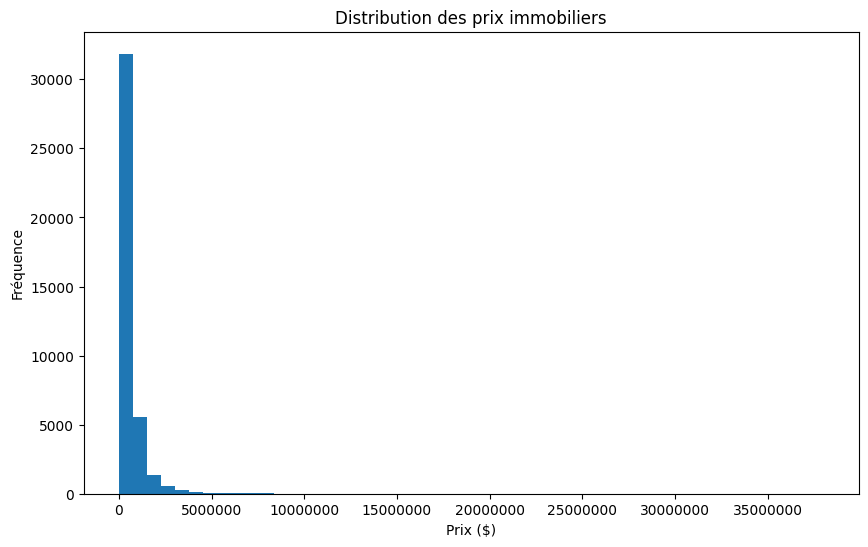

In [11]:
# Histogramme (sans seaborn)
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax.hist(df['Price'].dropna(), bins=50)
ax.set_title('Distribution des prix immobiliers')
ax.set_xlabel('Prix ($)')
ax.set_ylabel('Fréquence')
ax.ticklabel_format(style='plain', axis='x')
plt.show()

## 4. Agrégation par État
Prix moyen et nombre de maisons par **State**, triés par prix moyen décroissant.

In [12]:
price_by_state = (
    df.groupby('State')
      .agg(
          Prix_moyen=('Price', 'mean'), 
          Nombre_de_maisons=('Price', 'count')
      )
      .sort_values(by='Prix_moyen', ascending=False)
      .reset_index()
)
display(price_by_state.head(20))

,State,Prix_moyen,Nombre_de_maisons
0,California,"1,182,426.56",6056
1,Washington,"1,011,133.64",860
2,District of Columbia,"927,159.87",848
3,New York,"876,957.11",589
4,Florida,"859,774.15",1618
5,Georgia,"695,594.80",744
6,Colorado,"679,358.81",1774
7,Oregon,"647,763.41",853
8,North Carolina,"598,543.99",1777
9,Nevada,"571,731.67",895


## 5. Carte interactive (Folium + MarkerCluster)
Carte centrée sur les USA, avec un marqueur par bien immobilier. Pour des données volumineuses, pensez à échantillonner pour garder de bonnes performances.

In [13]:
def fmt_price(x):
    return f"${x:,.0f}"

m = folium.Map(location=[39.5, -98.35], tiles='openstreetmap', zoom_start=4)
cluster = MarkerCluster().add_to(m)

# Échantillonnage optionnel pour accélérer l'affichage (décommentez si besoin)
# data = df.sample(8000, random_state=42)  # par ex. 8000 points
data = df  # tous les points (peut être lent si ~40k points)

for _, row in data.iterrows():
    html = (
        f"<b>{row['Address']}</b><br>"
        f"{row['City']}, {row['State']} ({row['Zip Code']})<br>"
        f"Price: {fmt_price(row['Price'])}<br>"
        f"Beds: {row['Beds']} | Baths: {row['Baths']} | "
        f"Living Space: {row['Living Space']} ft²"
    )
    folium.Marker([row['Latitude'], row['Longitude']], popup=html).add_to(cluster)

m.save('map_markers_cluster.html')
print('✅ Carte enregistrée: map_markers_cluster.html')

✅ Carte enregistrée: map_markers_cluster.html
